<a href="https://colab.research.google.com/github/imswabhab/Projects-ML/blob/master/AlexaRatingsAnalysis_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing Relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#importing the data set
raw_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/amazon-alexa.tsv', sep = '\t')

In [0]:
#making a copy of the raw data
data = raw_data.copy()

In [5]:
data


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [6]:
data['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [0]:
#distinguishing positive feedback from negative

positive = data[data['feedback']==1]
negative = data[data['feedback']==0]

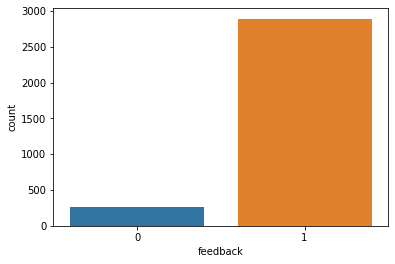

In [8]:
#Visualzing the Feedback
sns.countplot(data['feedback'])

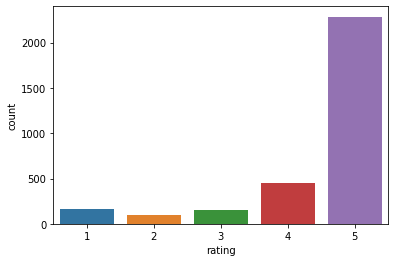

In [9]:
#visualizing the Ratings
sns.countplot(x = 'rating' , data = data)

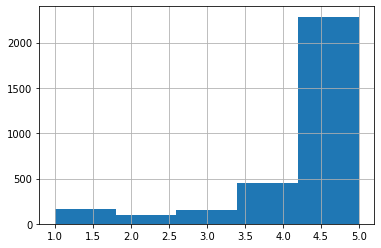

In [10]:
#Visualizing Ratings in Histogram
data['rating'].hist(bins=5)

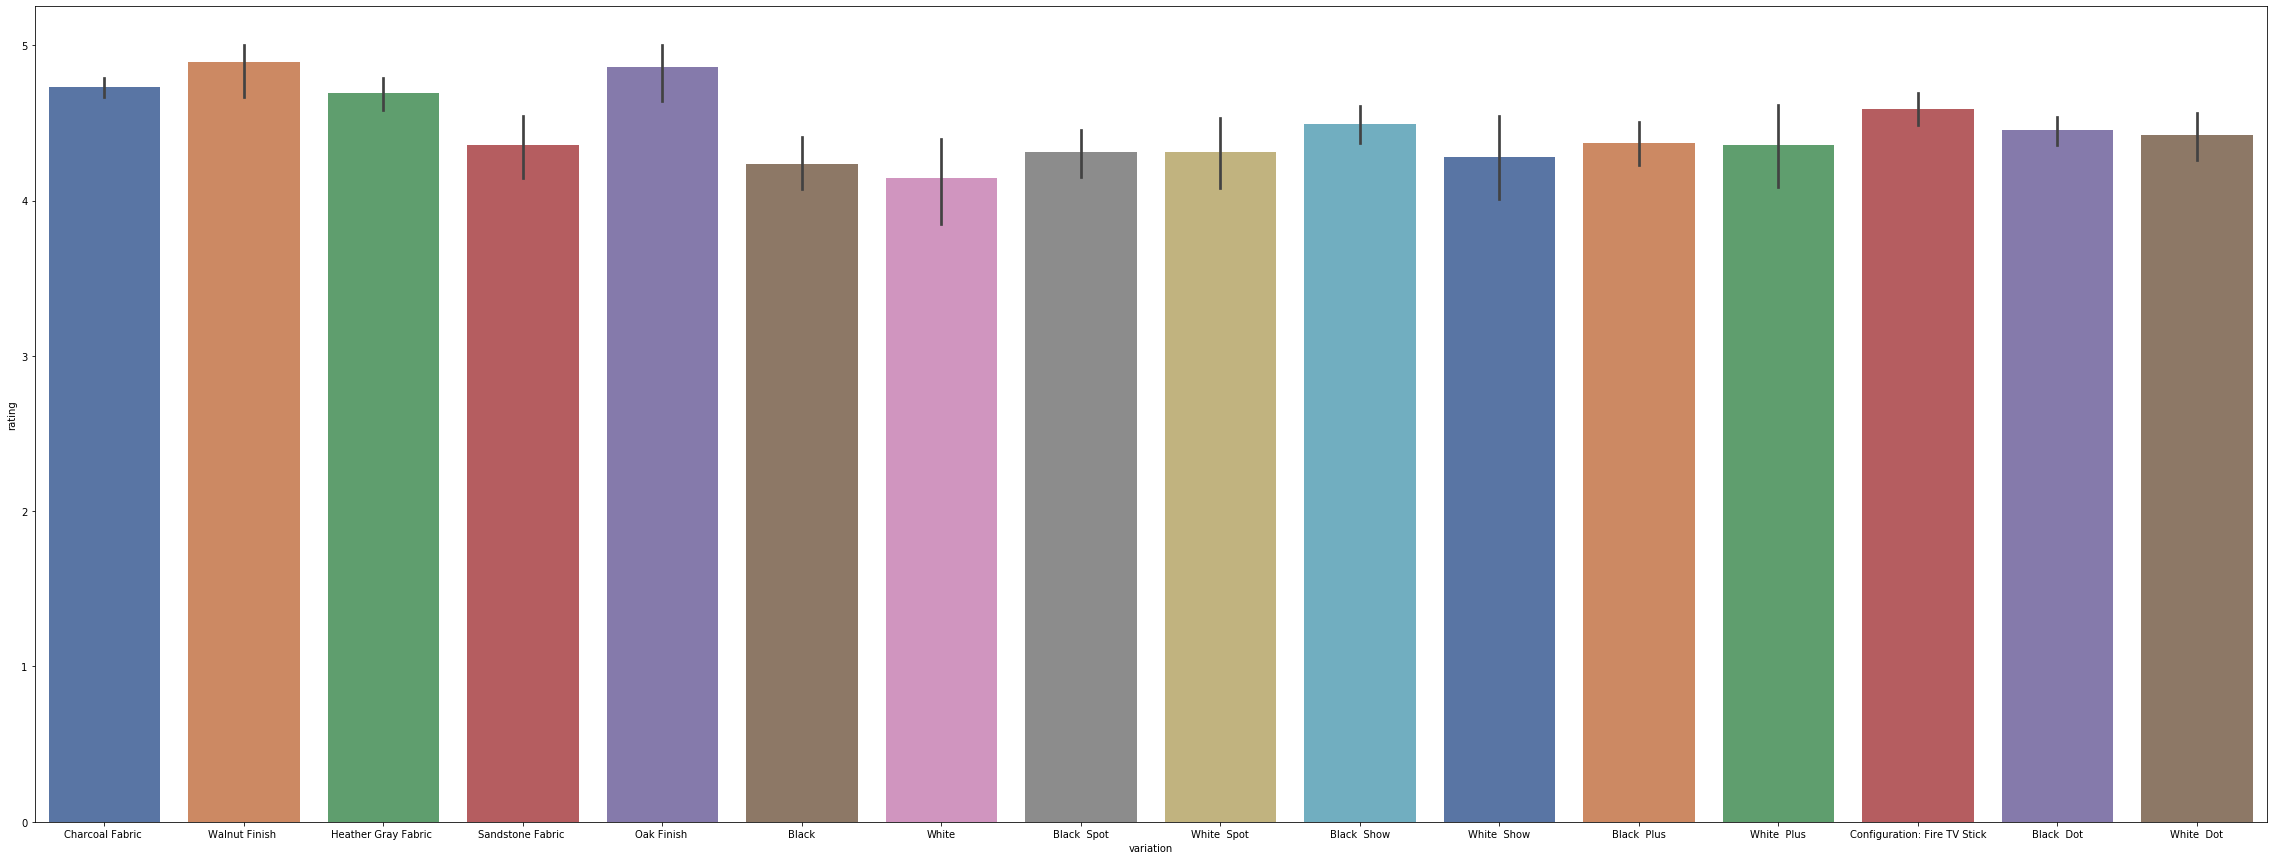

In [11]:
#checking the variation vs rating for relationship

plt.figure(figsize=(40,15))
sns.barplot(x = 'variation',y = 'rating',data = data,palette= 'deep')

In [0]:
#Dropping Unwanted Colunns from the dataset i.e, rating, date

data = data.drop(['date','rating'],axis = 1)

In [13]:
data

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [0]:
#making dummies of categorical values

variation_dummies = pd.get_dummies(data['variation'],drop_first= True)

In [15]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
#Dropping the orginal Variation table 
data.drop(['variation'] , axis = 1 , inplace= True)

In [0]:
data = pd.concat([data, variation_dummies], axis = 1)

In [18]:
data

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
#creating countVectorizer

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
Token = vectorizer.fit_transform(data['verified_reviews'])

In [20]:
#checking all the feature names
vectorizer.get_feature_names()

['00',
 '000',
 '07',
 '10',
 '100',
 '100x',
 '11',
 '1100sf',
 '12',
 '129',
 '12am',
 '15',
 '150',
 '18',
 '19',
 '1964',
 '1990',
 '1gb',
 '1rst',
 '1st',
 '20',
 '200',
 '2000',
 '2017',
 '229',
 '23',
 '24',
 '25',
 '29',
 '2nd',
 '2package',
 '30',
 '300',
 '30pm',
 '34',
 '360',
 '39',
 '3rd',
 '3x',
 '3xs',
 '40',
 '45',
 '48',
 '4am',
 '4ghz',
 '4k',
 '4th',
 '50',
 '54',
 '5am',
 '5ghz',
 '5th',
 '600',
 '62',
 '672',
 '6th',
 '70',
 '75',
 '79',
 '80',
 '80s',
 '81',
 '83',
 '85',
 '88',
 '888',
 '8gb',
 '90',
 '91',
 '911',
 '99',
 '_specifically_',
 'a1',
 'a19',
 'abay',
 'abc',
 'abd',
 'abilities',
 'ability',
 'able',
 'abode',
 'about',
 'above',
 'absolutely',
 'absolutly',
 'ac',
 'accent',
 'acceptable',
 'accepting',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessories',
 'accesss',
 'accident',
 'accidentally',
 'accompanying',
 'accomplish',
 'accomplished',
 'according',
 'accordingly',
 'account',
 'accounts',
 'accuracy',
 'accurate',
 'accu

In [21]:
print(Token.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
#Dropping Verified Reviews column
data.drop(['verified_reviews'], axis = 1, inplace= True)

In [0]:
#Converting Token array to concate to the data set

reveiws = pd.DataFrame(Token.toarray())

In [0]:
#concanate with orginal dataset

data = pd.concat([data, reveiws] , axis = 1)

In [25]:
data

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Sp;itting the dataset into X , y
x = data.drop(['feedback'] , axis = 1)
y= data['feedback']

In [38]:
x.shape

(3150, 4059)

In [40]:
y.shape

(3150,)

In [0]:
#creating training and taest test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [43]:
x_train.shape 

(2520, 4059)

In [45]:
x_test.shape

(630, 4059)

In [51]:
#Building the model
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units = 400 , activation= 'relu', input_shape =(4059, ) ))
classifier.add(tf.keras.layers.Dense(units = 400 , activation= 'relu'))
classifier.add(tf.keras.layers.Dense(units = 1 , activation= 'sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [52]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 400)               1624000   
_________________________________________________________________
dense_6 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 401       
Total params: 1,784,801
Trainable params: 1,784,801
Non-trainable params: 0
_________________________________________________________________


In [0]:
classifier.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [57]:
epochs_hist = classifier.fit(x_train,y_train, epochs = 20)

Train on 2520 samples
Epoch 1/20
2520/2520 [==============================] - 2s 840us/sample - loss: 0.2658 - acc: 0.9159
Epoch 2/20
2520/2520 [==============================] - 0s 174us/sample - loss: 0.0797 - acc: 0.9734
Epoch 3/20
2520/2520 [==============================] - 0s 172us/sample - loss: 0.0297 - acc: 0.9901
Epoch 4/20
2520/2520 [==============================] - 0s 164us/sample - loss: 0.0192 - acc: 0.9933
Epoch 5/20
2520/2520 [==============================] - 0s 152us/sample - loss: 0.0166 - acc: 0.9933
Epoch 6/20
2520/2520 [==============================] - 0s 165us/sample - loss: 0.0154 - acc: 0.9929
Epoch 7/20
2520/2520 [==============================] - 0s 177us/sample - loss: 0.0177 - acc: 0.9933
Epoch 8/20
2520/2520 [==============================] - 0s 172us/sample - loss: 0.0157 - acc: 0.9944
Epoch 9/20
2520/2520 [==============================] - 0s 170us/sample - loss: 0.0147 - acc: 0.9925
Epoch 10/20
2520/2520 [==============================] - 0s 174us/sam

In [0]:
#evalulating the model

y_pred = classifier.predict(x_test)

In [59]:
y_pred

array([[1.00000000e+00],
       [9.99993145e-01],
       [9.97687221e-01],
       [9.99362409e-01],
       [1.00000000e+00],
       [9.99999642e-01],
       [9.99999881e-01],
       [1.00000000e+00],
       [9.99880075e-01],
       [1.00000000e+00],
       [9.99851704e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99991596e-01],
       [9.98765230e-01],
       [9.99973714e-01],
       [2.35438347e-06],
       [9.99999642e-01],
       [9.86330152e-01],
       [9.97829020e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99975443e-01],
       [9.99999940e-01],
       [9.99991298e-01],
       [9.99663889e-01],
       [6.66975975e-05],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99998391e-01],
       [9.92422462e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99999881e-01],
       [9.99991715e-01],
       [9.99999881e-01],
       [1.00000000e+00],
       [1.00000000e+00],


In [0]:
y_pred = (y_pred > 0.5)

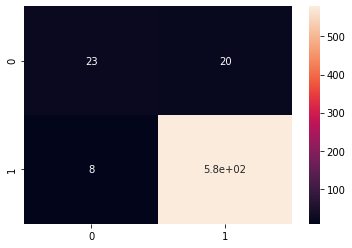

In [62]:
#creating confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot= True)

Text(0, 0.5, 'Training Loss')

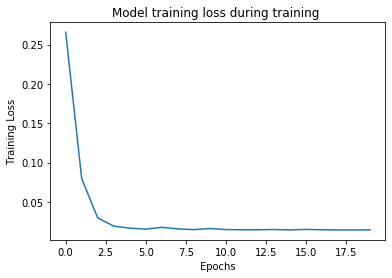

In [63]:
#plotting the training Loss of the model
plt.plot(epochs_hist.history['loss'])
plt.title ("Model training loss during training ")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")

Text(0, 0.5, 'Training Loss')

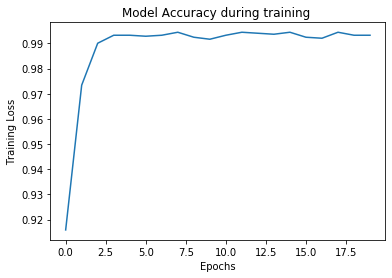

In [66]:
#plotting the Accuracy of the model
plt.plot(epochs_hist.history['acc'])
plt.title ("Model Accuracy during training ")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")